In [ ]:
#import data

#from google.colab import files
#uploaded = files.upload()

In [ ]:
#!pip install -q kaggle#

In [ ]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets list -s Frasier

In [ ]:
#!kaggle datasets download -d sulabhbista/frasier-dialogs

In [ ]:
#!unzip frasier-dialogs.zip

In [ ]:
#imports

import io

import matplotlib.pyplot as plt
% matplotlib inline

import pandas as pd

from wordcloud import WordCloud

import seaborn as sns
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
scripts = pd.read_csv('https://raw.githubusercontent.com/claudiasofiaC/build-week/master/script.csv?token=AMYQQCXYLDLFRPCGH3TQY5K5XLRR2')

scripts.head()

,url,cast,dialog,timestamp
0,http://www.kacl780.net/frasier/transcripts/sea...,Frasier,"[firmly] Listen to yourself, Bob! You follow ...",2018-04-13 07:43:16
1,http://www.kacl780.net/frasier/transcripts/sea...,Roz,"Yes, Dr Crane. On line four, we have Russell ...",2018-04-13 07:43:16
2,http://www.kacl780.net/frasier/transcripts/sea...,Frasier,"[presses a button] Hello, Russell. This is Dr...",2018-04-13 07:43:16
3,http://www.kacl780.net/frasier/transcripts/sea...,Russell,"[v.o.] Well, I've been feeling sort of, uh, yo...",2018-04-13 07:43:16
4,http://www.kacl780.net/frasier/transcripts/sea...,Frasier,"Er, Russell, we're just about at the end of ou...",2018-04-13 07:43:16


In [ ]:
#ya know, i may not even need this csv.

# the scripts csv turned out to be messier than i initially realized.
# i am thinking that i can just make subsets of the charcters that i want to keep

#episodes = pd.read_csv('episode.csv')

In [ ]:
print(scripts.shape)
scripts.head()

(63945, 4)


,url,cast,dialog,timestamp
0,http://www.kacl780.net/frasier/transcripts/sea...,Frasier,"[firmly] Listen to yourself, Bob! You follow ...",2018-04-13 07:43:16
1,http://www.kacl780.net/frasier/transcripts/sea...,Roz,"Yes, Dr Crane. On line four, we have Russell ...",2018-04-13 07:43:16
2,http://www.kacl780.net/frasier/transcripts/sea...,Frasier,"[presses a button] Hello, Russell. This is Dr...",2018-04-13 07:43:16
3,http://www.kacl780.net/frasier/transcripts/sea...,Russell,"[v.o.] Well, I've been feeling sort of, uh, yo...",2018-04-13 07:43:16
4,http://www.kacl780.net/frasier/transcripts/sea...,Frasier,"Er, Russell, we're just about at the end of ou...",2018-04-13 07:43:16


In [ ]:
#trimming down the df

copy_df = scripts.drop(['url', 'timestamp'], axis=1)

In [ ]:
copy_df.head()

,cast,dialog
0,Frasier,"[firmly] Listen to yourself, Bob! You follow ..."
1,Roz,"Yes, Dr Crane. On line four, we have Russell ..."
2,Frasier,"[presses a button] Hello, Russell. This is Dr..."
3,Russell,"[v.o.] Well, I've been feeling sort of, uh, yo..."
4,Frasier,"Er, Russell, we're just about at the end of ou..."


In [ ]:
#
copy_df['cast'].value_counts()

In [ ]:
copy_df.isnull().sum()

cast                2
dialog            157
Frasier_dialog      0
dtype: int64

In [ ]:
#drop na rows
copy_df = copy_df.dropna()

In [ ]:
#take out CUT TO 
#first 5 rows are our main cast


In [ ]:
#subsets

dropped_scripts = copy_df['cast'].value_counts(normalize=True, ascending=False)

In [ ]:
main_cast = dropped_scripts[:5]

In [ ]:
main_cast

Frasier    0.330595
Niles      0.159560
Martin     0.119599
Daphne     0.082194
Roz        0.074230
Name: cast, dtype: float64

In [ ]:
main_cast.round(3)

Frasier    0.331
Niles      0.160
Martin     0.120
Daphne     0.082
Roz        0.074
Name: cast, dtype: float64

In [ ]:
dropped_scripts.head()

Frasier    0.330595
Niles      0.159560
Martin     0.119599
Daphne     0.082194
Roz        0.074230
Name: cast, dtype: float64

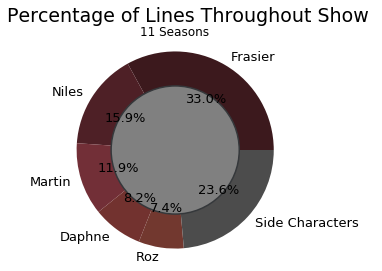

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# The slices will be ordered and plotted counter-clockwise.
# input by hand since there are only 5 varibles


labels = 'Frasier', 'Niles', 'Martin', 'Daphne', 'Roz', 'Side Characters'
sizes = [ 0.330, 0.159,  0.119, 0.082, 0.074, .236]

#chose a wine color scheme, the characters are constanly drinking wine
colors = ['#3c191d',  '#4e2026', '#722f37', '#72322f', '#72382f', '#4C4C4C']
explode = (0, 0, 0, 0, 0, 0)  # explode a slice if required


plt.rcParams['font.size'] = 13

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', textprops={'color':"black"}, shadow=False)



#draw a circle at the center of pie to make it look like a donut
#cheating :)
centre_circle = plt.Circle((0,0),0.65,color='#35383B', fc='#808080',linewidth=1.50)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.suptitle('Percentage of Lines Throughout Show ', x=.55, y=1, fontsize=19)
plt.title('11 Seasons', fontsize=12)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show() 

In [ ]:
#isolate just one character's dialog

copy_df['Frasier_dialog'] = copy_df['cast'] == 'Frasier'

copy_df.head()

,cast,dialog,Frasier_dialog
0,Frasier,"[firmly] Listen to yourself, Bob! You follow ...",True
1,Roz,"Yes, Dr Crane. On line four, we have Russell ...",False
2,Frasier,"[presses a button] Hello, Russell. This is Dr...",True
3,Russell,"[v.o.] Well, I've been feeling sort of, uh, yo...",False
4,Frasier,"Er, Russell, we're just about at the end of ou...",True


In [ ]:
lines = copy_df['cast'].value_counts(ascending=False)

lines.head(10)

Frasier    21088
Niles      10178
Martin      7629
Daphne      5243
Roz         4735
Bulldog      664
Lilith       516
Kenny        449
Bebe         381
Donny        265
Name: cast, dtype: int64

In [ ]:
frasier = copy_df[copy_df['Frasier_dialog'] == True]

print(frasier.shape)
frasier.head(10)

(21088, 3)


,cast,dialog,Frasier_dialog
0,Frasier,"[firmly] Listen to yourself, Bob! You follow ...",True
2,Frasier,"[presses a button] Hello, Russell. This is Dr...",True
4,Frasier,"Er, Russell, we're just about at the end of ou...",True
6,Frasier,"[annoyed; rips off his headphones] Oh, for cry...",True
7,Frasier,"Well, the rest of the show was pretty good. [R...",True
9,Frasier,"Roz, in the trade we call that ""avoidance."" D...",True
11,Frasier,I am not a piece of Lalique. I can handle cri...,True
13,Frasier,[takes the notepaper] You say my brother calle...,True
17,Frasier,"[looks up] Oh, I'm sorry, Niles, I didn't real...",True
19,Frasier,"Oh Niles, you're a psychiatrist - you know wha...",True


In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
frasier.head()

,cast,dialog,timestamp,Frasier_dialog
0,Frasier,"[firmly] Listen to yourself, Bob! You follow ...",2018-04-13 07:43:16,True
2,Frasier,"[presses a button] Hello, Russell. This is Dr...",2018-04-13 07:43:16,True
4,Frasier,"Er, Russell, we're just about at the end of ou...",2018-04-13 07:43:16,True
6,Frasier,"[annoyed; rips off his headphones] Oh, for cry...",2018-04-13 07:43:16,True
7,Frasier,"Well, the rest of the show was pretty good. [R...",2018-04-13 07:43:16,True


In [ ]:
text_f = frasier.dialog[0]


In [ ]:
wordcloud = WordCloud(colormap='bone',
background_color="black").generate(text_f)



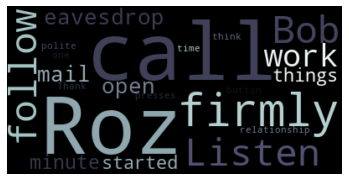

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(words for words in frasier.dialog)
print ("There are {} words in the Frasier dialog column.".format(len(text)))


There are 1593362 words in the Frasier dialog column.


In [ ]:
scripts_clean.describe()

,cast,dialog,timestamp,Frasier_dialog,Roz_dialog,Niles_dialog,Daphne_dialog,Martin_dialog
count,63788,63788,63788,63788,63788,63788,63788,63788
unique,1605,58435,310,2,2,2,2,2
top,Frasier,What?,2018-04-13 22:13:29,False,False,False,False,False
freq,21088,226,338,42700,59053,53610,58545,56159


In [ ]:
scripts_clean['dialog'].value_counts(ascending=True)

NameError: ignored

In [ ]:
copy_df.isnull().sum()

cast           2
dialog       157
timestamp      0
dtype: int64

In [ ]:
copy_df = copy_df.dropna()

print(copy_df.isnull().sum())

cast         0
dialog       0
timestamp    0
dtype: int64


In [ ]:
#treemap 

pip install squarify

In [ ]:
import squarify

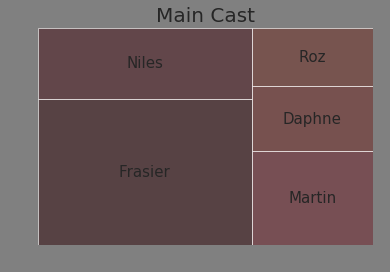

In [ ]:
#again since it was such a small set, i just did it manually

squarify.plot(sizes=[0.330, 0.159,  0.119, 0.082, 0.074], 
label=['Frasier', 'Niles', 'Martin', 'Daphne', 'Roz'],
color=['#3c191d',  '#4e2026', '#722f37', '#72322f', '#72382f'],
alpha=.6, text_kwargs={'fontsize':15}, ) 

plt.title('Main Cast', fontsize=20, )
plt.axis('off')
plt.show()

In [ ]:
#how many times the rain is mentioned
#thought i was going to do something with this...

sub = 'rain'

In [ ]:
copy_df['rainy'] = copy_df['dialog'].str.find(sub)

In [ ]:
copy_df.head(10)

In [ ]:
copy_df['rainy'].mean()

-0.6688248573399386

In [ ]:
#top 10 characters dialog in a bar graph

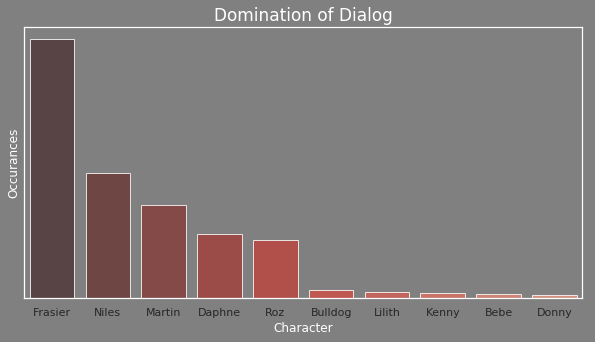

In [ ]:
main_ish_cast_count = copy_df['cast'].value_counts()
main_ish_cast_count = main_ish_cast_count[:10,]

plt.figure(figsize=(10,5))
sns.set(rc={'axes.facecolor':'grey', 'figure.facecolor': 'grey'})

sns.barplot(main_ish_cast_count.index, main_ish_cast_count.values, 
            alpha=0.8, palette='Reds_d'
)

plt.title('Domination of Dialog', color='white', fontsize=17)
plt.ylabel('Amount of Lines', color='white', fontsize=12)
plt.yticks([])
plt.xlabel('Character', color='white', fontsize=12)
plt.show()